In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print ("total data :", data.shape, "\n")
data.info()

total data : (891, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Survived', ylabel='count'>

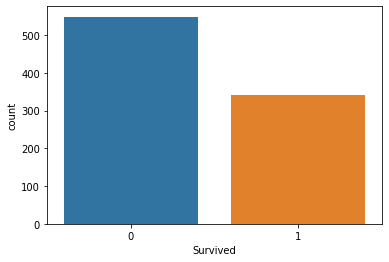

In [6]:
sns.countplot(x='Survived', data=data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

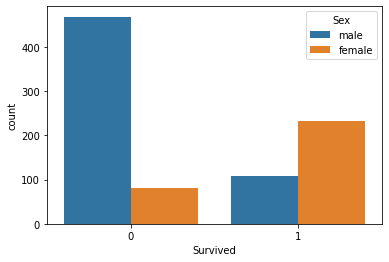

In [7]:
sns.countplot(x='Survived', hue='Sex', data=data)

Dapat disimpukan bahwa korban yang meninggal lebih banyak berjenis kelamin laki - laki sedangkan yang selamat lebih banyak dari perempuan.

<AxesSubplot: xlabel='Survived', ylabel='count'>

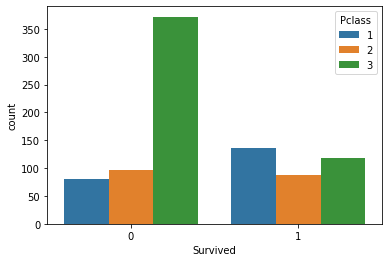

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=data)

<AxesSubplot: ylabel='Frequency'>

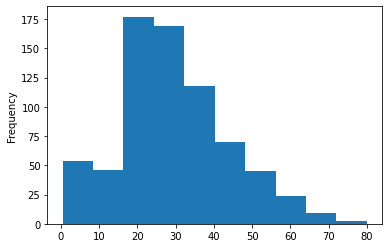

In [11]:
data['Age'].plot.hist()

<AxesSubplot: xlabel='Age', ylabel='Density'>

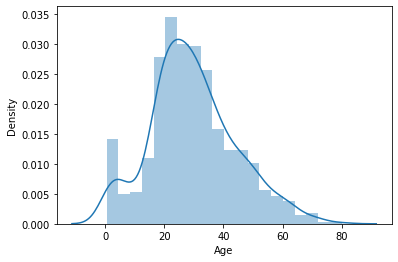

In [13]:
sns.distplot(data['Age'])

<AxesSubplot: ylabel='Frequency'>

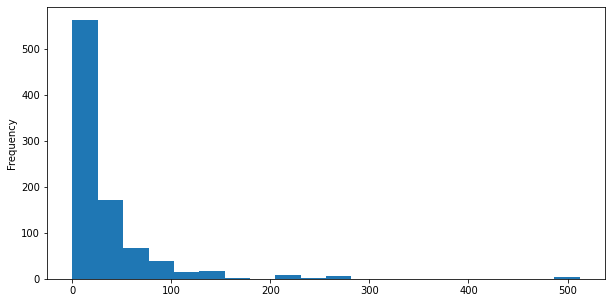

In [21]:
data['Fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot: xlabel='SibSp', ylabel='count'>

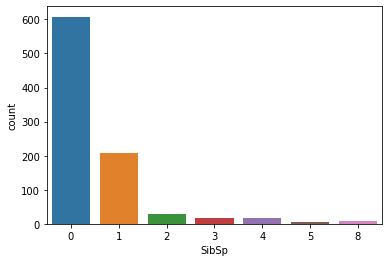

In [30]:
sns.countplot(x='SibSp', data=data)

In [33]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

keimpulannya age, cabin dan embranked memiliki nilai kosong/missing value

<AxesSubplot: >

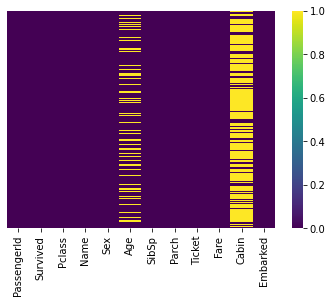

In [41]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

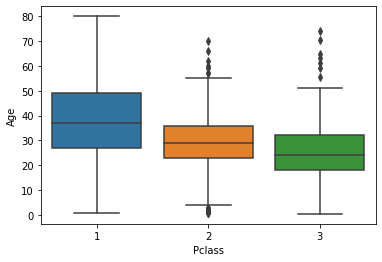

In [45]:
sns.boxplot(x='Pclass',y='Age', data=data)

Bahwa Class 1 Banyak Penumpang Yang Berumur 30-50 Tahun, Class 2 Banyak Penumpang Berumur 25-40 Tahun Sedangkan Class 3 Banyak Penumpang Yang Berumur 20-30 Tahun.

In [44]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [47]:
data.drop('Cabin', axis=1, inplace=True)

Hapus Kolom Cabin Karena Kita Tidak Membutuhkan Kolom Ini Dalam Proses Analisa Data Kita. Alasan Lain Kolom Ini Dihapus Karena Banyaknya Data Yang Kosong Pada Kolom Cabin Ini Sehingga Kurang Baik Untuk Proses Analisa Data.

In [53]:
Kelas_1 = data.loc[data['Pclass'] == 1,'Age'].mean()
Kelas_2 = data.loc[data['Pclass'] == 2,'Age'].mean()
Kelas_3 = data.loc[data['Pclass'] == 3,'Age'].mean()

print("Rata-Rata Umur Berdasarkan Pclass 1 : %i" %Kelas_1, "Tahun")
print("Rata-Rata Umur Berdasarkan Pclass 2 : %i" %Kelas_2, "Tahun")
print("Rata-Rata Umur Berdasarkan Pclass 3 : %i" %Kelas_3, "Tahun")

Rata-Rata Umur Berdasarkan Pclass 1 : 38 Tahun
Rata-Rata Umur Berdasarkan Pclass 2 : 29 Tahun
Rata-Rata Umur Berdasarkan Pclass 3 : 25 Tahun


In [58]:
def Setting_umur(Cols):
  Age = Cols[0]
  Pclass = Cols[1]
  
  if(pd.isnull(Age)):
    if(Pclass == 1):
      return 38
    elif(Pclass == 2):
      return 29
    elif(Pclass == 3):
      return 25
  else:
    return Age

Buat Sebuat Function Atau Method Untuk Mengatur Nilai Yang Kosong Pada Kolom Age Berdasarkan Hasil Rata-Rata Yang Kita Peroleh Dari Sintak Sebelumnya

In [60]:
data['Age'] = data[['Age','Pclass']].apply(Setting_umur, axis=1)

Aplikasikan Function Atau Method Yang Kita Buat Ini Ke Dalam Kolom Age Yang Kosong Tersebut.

In [61]:
data.dropna(inplace=True)

In [62]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [63]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [65]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Pisahkan Data Jenis Kelamin (Sex) Berdasarkan Value Yang Dimilikinya. Dari Proses Ini Kita Akan Memiliki 2 Kolom Yaitu Male Dan Female.

In [79]:
jenkel = pd.get_dummies(data['Sex'], drop_first=True)
jenkel.head()

,male
0,1
1,0
2,0
3,0
4,1


Ambil Data Penumpang Yang Berjenis Kelamin Laki-Laki Untuk Proses Analisa Kita Selanjutnya. Hal Ini Dikarenakan Data Korban Yang Tidak Selamat Banyak Berjenis Kelamin Laki-Laki.

In [82]:
Emb = pd.get_dummies(data['Embarked'], drop_first=True) 
Emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Memisahkan Setiap Data Yang Ada Pada Kolom Ini Menjadi Beberapa Kolom. Pada Tahapan Ini Kita Juga Menghapus Kolom Data Embarked = C

In [86]:
Pcl = pd.get_dummies(data['Pclass'], drop_first=True) 
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


Proses Ini Digunakan Untuk Memecahkan Data Kategorial Menjadi Data Tunggal. Pada Tahapan Ini Kita Menghapus Kolom Dengan Nilai Pclass = 1 Karena Korban Dari Titanic Pada Pclass 1 Sedikit.

In [92]:
Data = pd.concat([data, jenkel, Emb, Pcl], axis=1) 
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


Setelah Semua Data Dipisahkan, Tahapan Selanjutnya Kita Masukkan Seluruh Variabel Yang Menyimpan Data Pemisahan Tadi Ke Dalam Dataset Kita. Dan Cek Kondisi Dari Dataset Kita. Disini Dapat Kita Lihat Bahwa Dataset Kita Memiliki Tambahan Beberapa Kolom Seperti Male, Q, S, 2 Dan 3.m

In [98]:
data.drop(['Sex','Embarked','Pclass', 'PassengerId','Name','Ticket'], axis=1, inplace=True) 
data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


Selanjutnya Kita Hapus Beberapa Kolom Yang Tidak Kita Butuhkan Pada Proses Analisa Data Kita Nantinya. Adapun Kolom Yang Dihapus Adalah Sex, Embarked, Pclass, PassengerID, Name Dan Ticket.

# Analisa Data Menggunakan Logistic Regression

In [104]:
x= data.drop('Survived', axis=1) 
y= data['Survived']

Memisahkan Terlebih Dahulu Antara Variabel Dependen (Y) Dan Variabel Independent (X). Untuk Variabel Y Yaitu Kolom Survived Dan Varibel X Yaitu Kolom Selain Kolom Survived. Hal Ini Bertujuan Untuk Melakukan Prediksi Korban (Selamat  / Tidak Selamat) Berdasarkan Kolom Variabel X.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [107]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression()

In [108]:
prediksi = logModel.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediksi)

array([[153,  13],
       [ 69,  32]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, prediksi)

0.6928838951310862